In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
df = pd.read_csv(r"C:\Users\sruno\Downloads\movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [4]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [9]:
df = df.dropna()

In [10]:
#fix the incorect year data
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [12]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0,3661,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120.0,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020


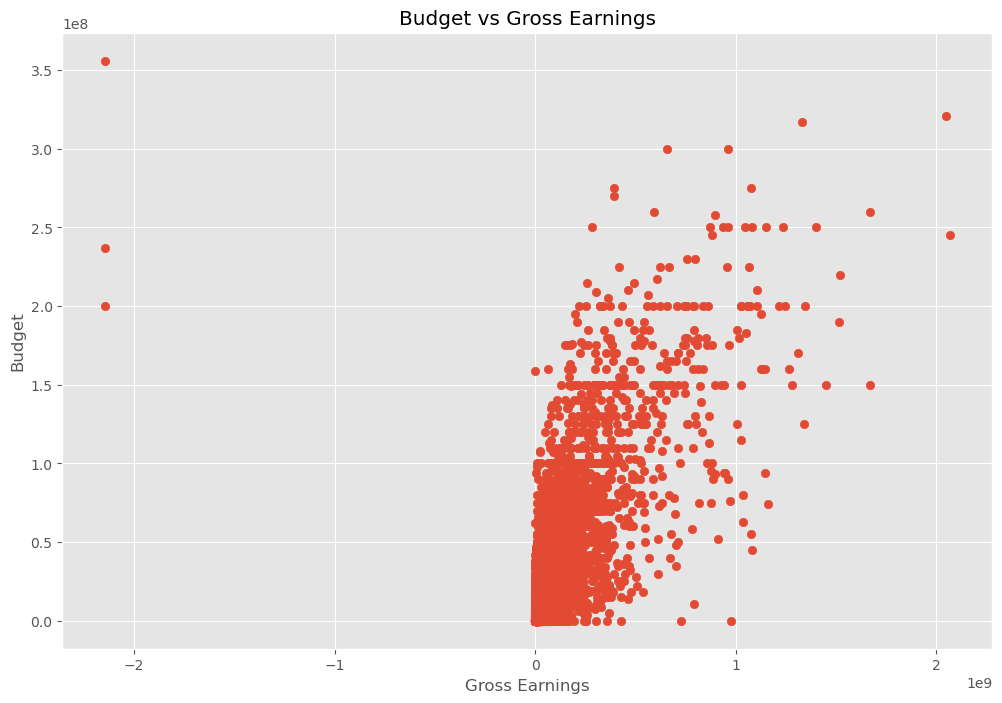

In [20]:
# Scatter plot with budget vs gross
plt.scatter(x="gross", y="budget", data=df)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<Axes: xlabel='gross', ylabel='budget'>

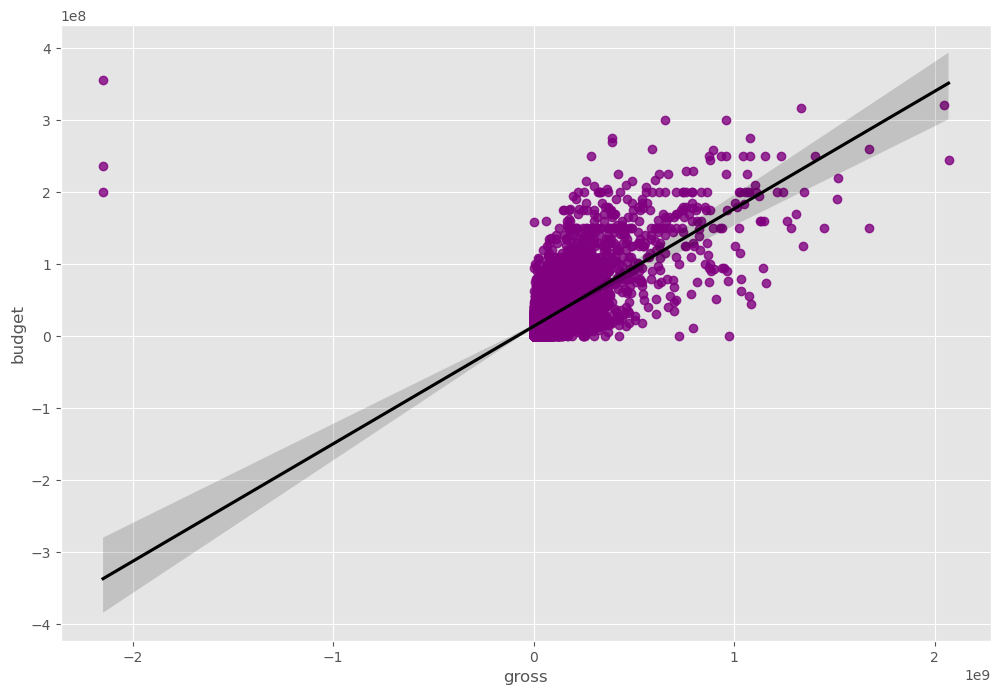

In [24]:
#Budget vs Gross Earnings seaborn plot
sns.regplot(x="gross", y="budget", data=df,scatter_kws={"color":"purple"},line_kws={"color":"black"} )

In [32]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.259044,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.171122,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.573871,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.687292,0.270042,0.305530
gross,0.259044,0.171122,0.573871,0.687292,1.000000,0.203564,0.252184
runtime,0.120676,0.400574,0.309366,0.270042,0.203564,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.252184,0.120370,1.000000


In [38]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56329179122
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Walt Disney Pictures         36327887792
Twentieth Century Fox        30913193094
New Line Cinema              19867862616
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Marvel Studios               10120607435
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [39]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


C:\Users\sruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sruno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='gross'>

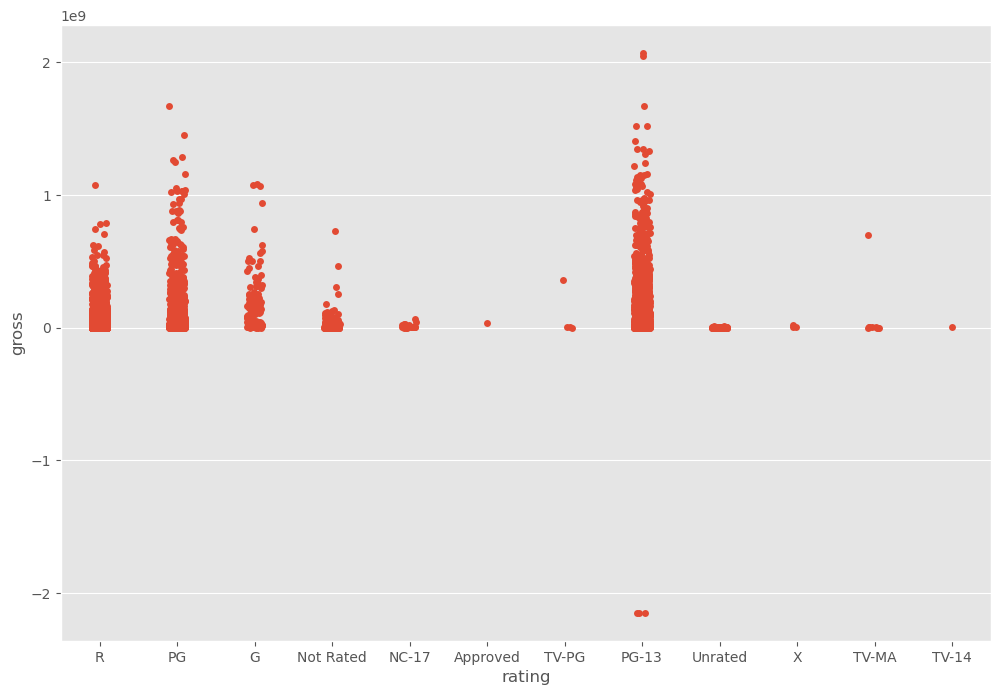

In [42]:
sns.stripplot(x="rating", y="gross", data=df)